### 数据挖掘流程

1.数据读取
- 读取数据
- 统计指标
- 数据规模

2.数据探索（特征理解）
- 单特征的分析，逐个变量分析对结果y的影响（X和Y之间的相关性）
- 多变量分析（X和X之间的相关性）
- 统计绘图

3.数据清洗和预处理
- 缺失值填充
- 特征的标准化、归一化
- 特征工程（筛选有价值的特征）
- 分析特征之间的相关性

4.建立模型
- 特征数据和标签准备
- 数据集切分
- 多种模型对比：交叉验证、调参（学习曲线，网格搜索）
- 集成算法（提升算法） XGBoost、GBDT、light—GBM、神经网络（多种集成）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

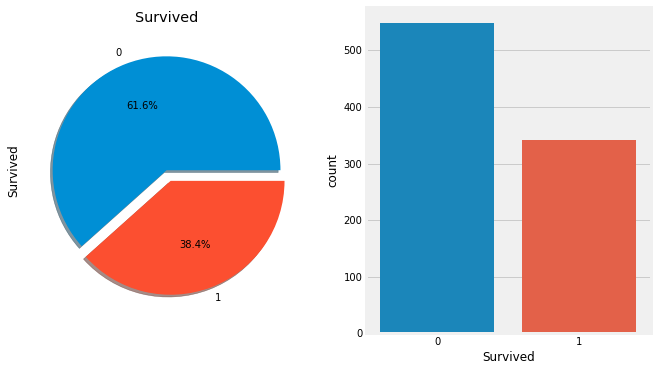

In [5]:
# 标签比例 获救比例情况
f,ax = plt.subplots(1,2,figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                        autopct='%1.1f%%',
                                        ax=ax[0],shadow=True)
ax[0].set_title('Survived')

sns.countplot('Survived',data=data,ax=ax[1])

In [71]:
# 不同性别下存活人数
data.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

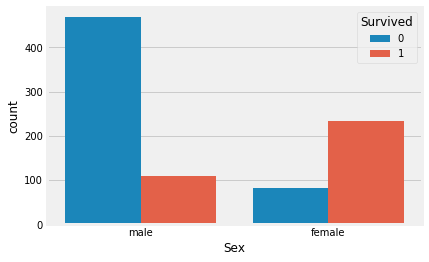

In [7]:
sns.countplot('Sex',hue='Survived',data=data)

In [72]:
data.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [8]:
# Pclass和获救之间的关系 交叉验证表  margins=True 代表聚合不聚合
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='GnBu_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


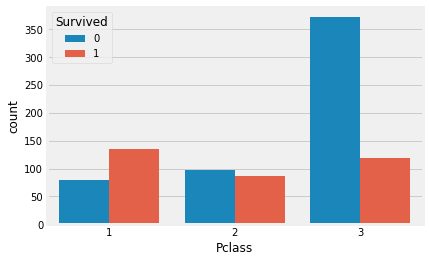

In [9]:
sns.countplot('Pclass',hue='Survived',data=data)

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

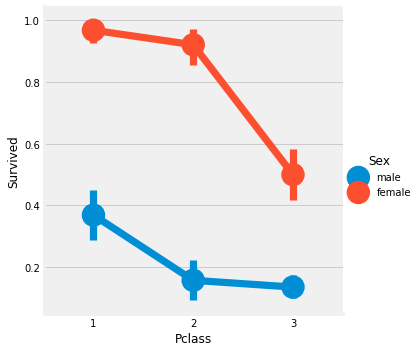

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

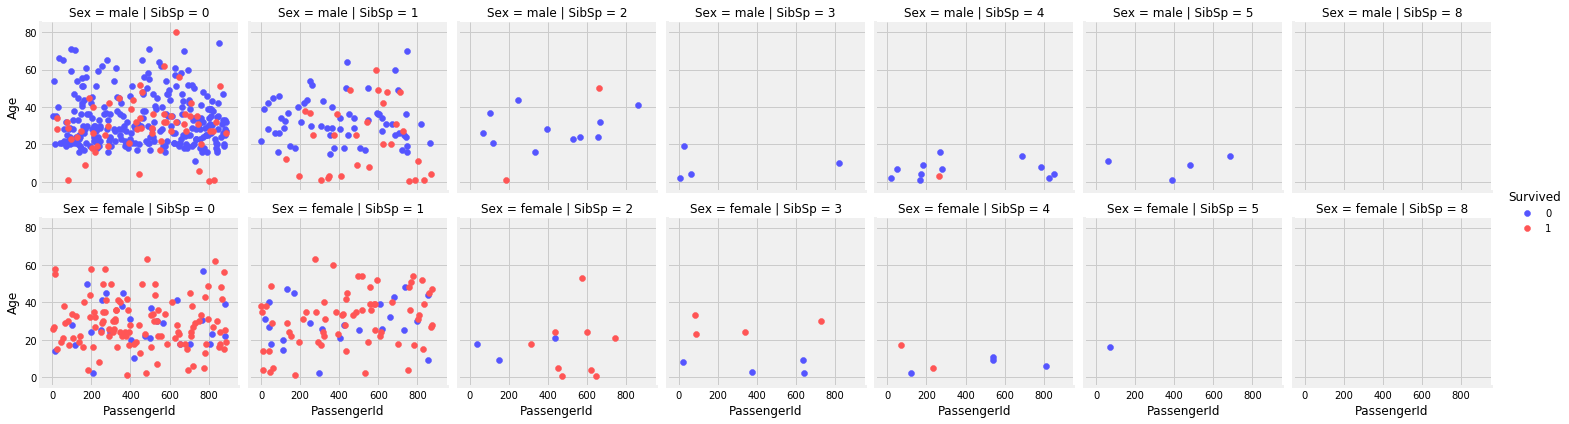

In [5]:
grid=sns.FacetGrid(data,col='SibSp',row='Sex',hue='Survived',palette='seismic')
grid=grid.map(plt.scatter,'PassengerId','Age')
grid.add_legend()
grid

#### 缺失值填充

In [83]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [84]:
data['initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['initial']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: initial, Length: 891, dtype: object

In [85]:
pd.crosstab(data.initial,data.Sex).T

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [87]:
re=[]
for i in data.initial.values:
    if i!='Master' and i!='Miss' and i!='Mr' and i!='Mrs':
        re.append(i.replace(i,'other'))
    else:
        re.append(i)

In [88]:
data['re']=re
data.re.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [94]:
data.groupby('re')['Sex'].count()

re
Master     40
Miss      182
Mr        517
Mrs       125
other      27
Name: Sex, dtype: int64

In [18]:
int(data.groupby('re')['Age'].mean()[0])

4

In [19]:
for i in data.re.values:
    data.loc[(data.Age.isnull())&(data.re==i),'Age']=int(data.groupby('re')['Age'].mean()[i])

In [20]:
data.Age.isnull().sum()

0

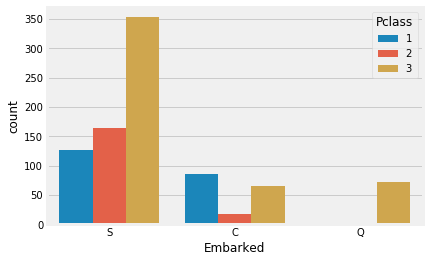

In [21]:
sns.countplot('Embarked',hue='Pclass',data=data)

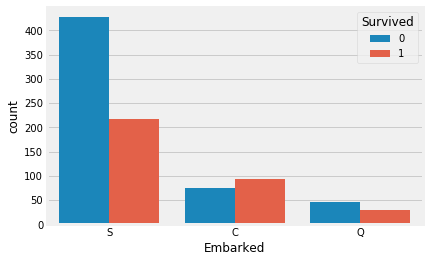

In [22]:
sns.countplot('Embarked',hue='Survived',data=data)

In [23]:
data['Embarked'].fillna('S',inplace=True)

In [24]:
data.Embarked.isnull().any()

False

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


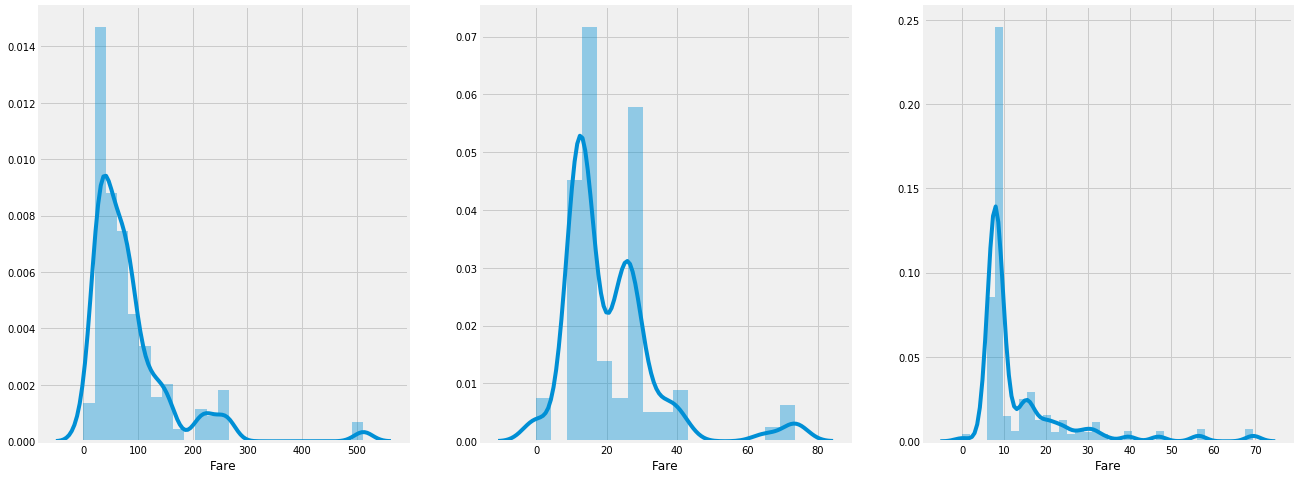

In [26]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])

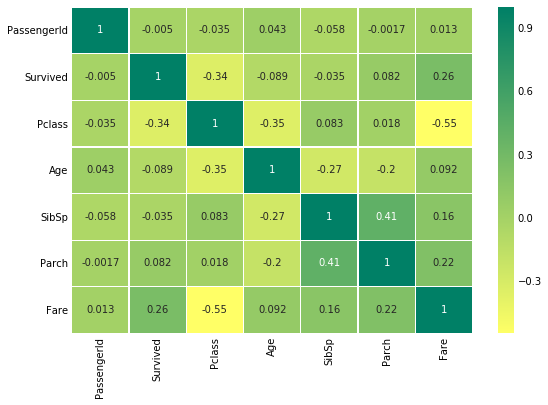

In [27]:
# 相关性热图
sns.heatmap(data.corr(),annot=True,linewidths=0.2,cmap='summer_r')
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.savefig('heatmap.png')

In [28]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Mr


In [29]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=65),'Age_band']=3
data.loc[data['Age']>65,'Age_band']=4
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Mr,1


In [30]:
from sklearn import preprocessing

In [31]:
lbl = preprocessing.LabelEncoder()
data['Sex']=lbl.fit_transform(data['Sex'])
data['Embarked']=lbl.fit_transform(data['Embarked'])
data['re']=lbl.fit_transform(data['re'])

In [32]:
data['Embarked'].unique()

array([2, 0, 1], dtype=int64)

In [33]:
one_hot=preprocessing.OneHotEncoder(sparse=False)
data['Embarked']=one_hot.fit_transform(data[['Embarked']])

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,Mr,2,2


In [35]:
data.drop(['PassengerId','Name','Age','Ticket','Cabin','initial'],axis=1,
         inplace=True)

In [36]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1
3,1,1,0,1,0,53.1000,0.0,3,2
4,0,3,1,0,0,8.0500,0.0,2,2


### 建模

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [39]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1
3,1,1,0,1,0,53.1000,0.0,3,2
4,0,3,1,0,0,8.0500,0.0,2,2


In [40]:
X = data.iloc[:,data.columns!='Survived']
y = data.iloc[:,data.columns=='Survived']

In [41]:
X.shape

(891, 8)

In [42]:
y.shape

(891, 1)

In [43]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,
                                           random_state=10)

In [44]:
# 逻辑回归
l = LogisticRegression()
l.fit(Xtrain,Ytrain)
l.score(Xtest,Ytest)

0.8100558659217877

In [45]:
pred_1 = l.predict(Xtest)
metrics.accuracy_score(Ytest,pred_1)

0.8100558659217877

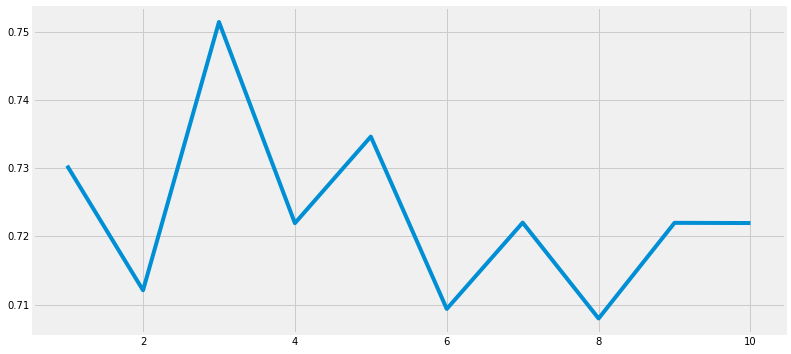

In [46]:
# KNN
score=[]

for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    CVS = cross_val_score(KNN,Xtrain,Ytrain,cv=5)
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)
fig = plt.gcf()
fig.set_size_inches(12,6)

In [47]:
max(score)

0.7514527725795331

In [48]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
KNN.score(Xtest,Ytest)

0.7597765363128491

#### 网格搜索

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
# 输出接口
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 9}

In [52]:
GR.best_score_

0.8300561797752809

In [53]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,min_samples_split=4).fit(Xtrain,Ytrain)
DTC.score(Xtest,Ytest)

0.8379888268156425

In [54]:
DTC.feature_importances_

array([0.16799063, 0.38566561, 0.07586498, 0.01259698, 0.27372801,
       0.01008347, 0.05592281, 0.0181475 ])

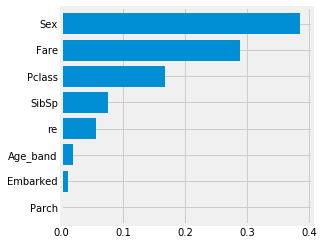

In [55]:
f = plt.figure(figsize=(4,4))
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=8,
                            min_samples_leaf=5,min_samples_split=4).fit(Xtrain,Ytrain)

pd.Series(DTC.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8)

#### ROC曲线

In [56]:
y_pred = DTC.predict(Xtest)

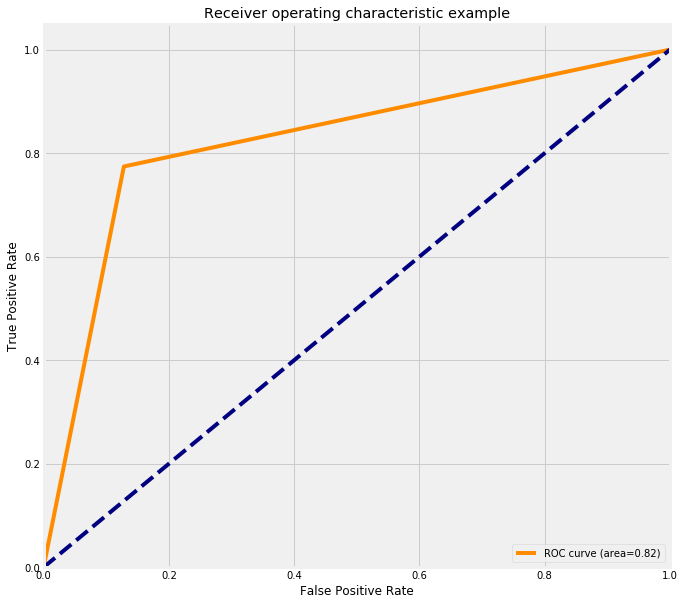

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve,auc # 计算roc和auc
# 计算真正率和假正率
fpr,tpr,threshold = roc_curve(Ytest,y_pred)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',
        label = 'ROC curve (area=%0.2f)'% roc_auc) # 假正率是横坐标，真正率是纵坐标

plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')

#### 混淆矩阵

In [67]:
from sklearn.model_selection import cross_val_predict

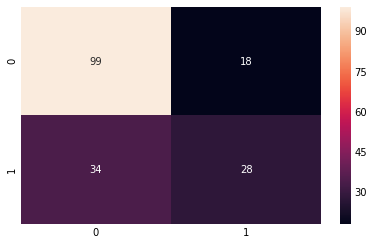

In [68]:

y_pred =cross_val_predict(KNeighborsClassifier(n_neighbors=3),Xtest,Ytest,cv=10)
sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')

In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
model = BaggingClassifier(base_estimator=DTC,
                         n_estimators=700,
                         random_state=0)
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.8659217877094972